In [3]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
                      ... 
2012-12-31 21:00:00    1.0
2012-12-31 22:00:00    1.0
2012-12-31 23:00:00    1.0
Name: Weather, Length: 8784, dtype: float64


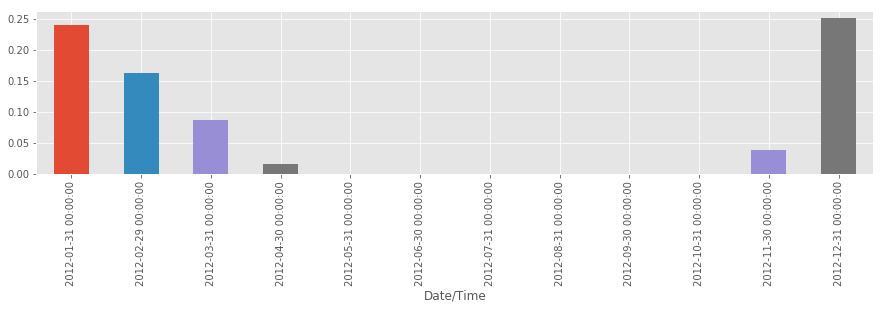

In [4]:
# Определяем те даты, на которые шёл снег и считаем % дней со снегом в семплах месяцев
dir = os.path.abspath(os.curdir).replace('pandas_graphs', 'data/').replace("\\", '/')
weather_2012 = pd.read_csv(dir + 'weather_2012.csv', parse_dates=True, index_col='Date/Time')

is_snowing = weather_2012['Weather'].str.contains('Snow').astype(float)
is_snowing.resample('M').mean().plot(kind='bar')

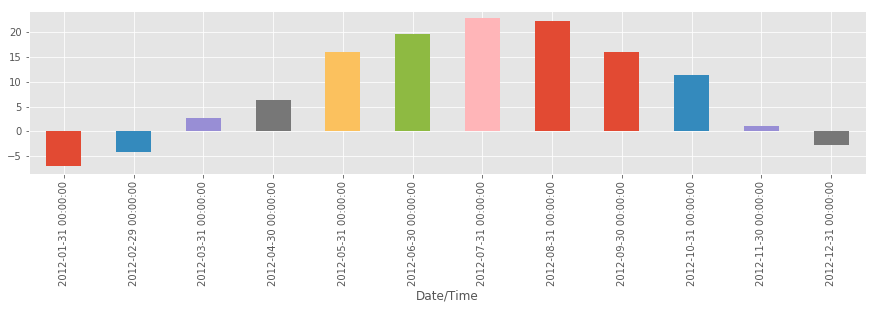

In [5]:
# Создаём сэмплы температуры по месяцам и считаем медиану
weather_2012['Temp (°C)'].resample('M').median().plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EB7023630>,
      dtype=object)

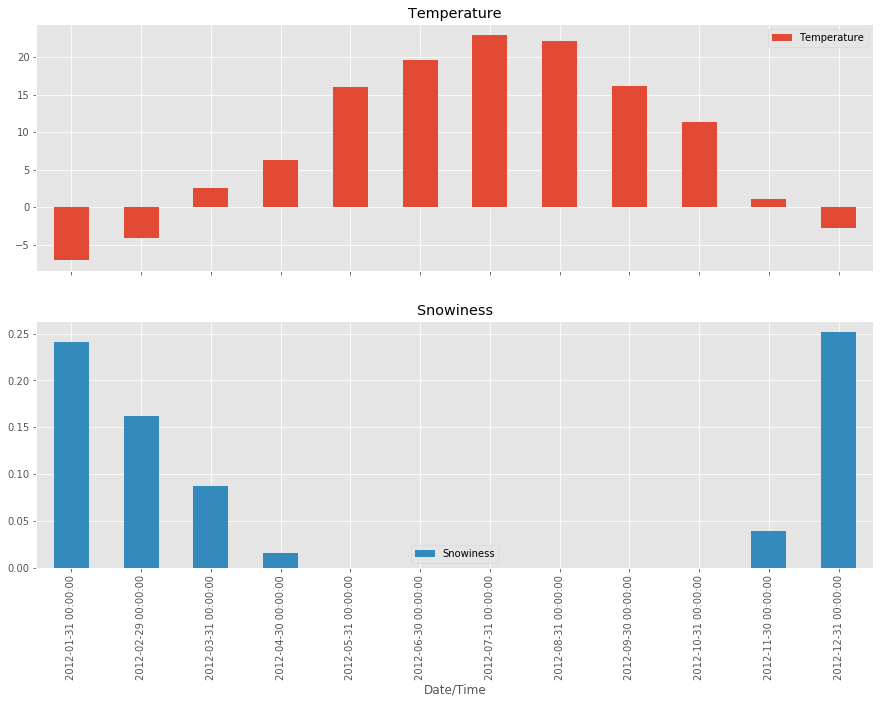

In [10]:
temperature = weather_2012['Temp (°C)'].resample('M').median()
snowiness = is_snowing.resample('M').mean()

temperature.name = 'Temperature'
snowiness.name = 'Snowiness'

stats = pd.concat([temperature, snowiness], axis=1)
type(stats)
stats.plot(kind='bar', subplots=True, figsize=(15, 10))